<a href="https://colab.research.google.com/github/mahynski/chemometric-carpentry/blob/main/notebooks/5_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
❓ ***Objective***: This notebook will introduce some machine learning models.  

🔁 ***Remember***: You can always revisit this notebook for reference again in the future.  Ideas and best practices will be reinforced in future notebooks, so don't worry about remembering everything the first time you see something new.

🧑 Author: Nathan A. Mahynski

📆 Date: June 10, 2024

---

We have discussed the concept of a pipeline and its 2 main aspects: preprocessing and modeling.  Conventional chemometric models 🔬, while often older than many machine learning 💻 ones, are still very useful because they are designed to handle specific situations encountered in chemometric applications that are not as routine in other disciplines (like $N << p$).  However, one reason [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) follows sklearn's [esimator API](https://scikit-learn.org/stable/developers/develop.html) is that the machine learning ecosystem is vast and has many powerful tools in it that we would like to leverage for chemometric studies.  Machine learning is now a mature, popular field with many introductory text books, tutorials, and other resources.  Here, we will only focus on the topics most relevant to chemometric modeling so the following summary is not remotely exhaustive.

Perhaps the most important thing to keep in mind is that our goal is not always to simply find the "best performing" model possible.  It is more nuanced than this.  In scientific applications, models should not only perform well (i.e., have $R^2 → 1$, or have high $TEFF$) but should also be interpretable.  

🤔 Imagine that you are presented with a model ⬛ that, when you ask it something about the physical world returns amazingly accurate predictions.  After asking a series of hard questions to develop some faith in the model, your next question would be: how is it doing that?!

For many other (non-scientific) applications, there is sometimes interest in this for reasons related to fairness, equity, and other factors, depending on the use.  However, models are all around us and many serve fairly benign tasks.  In those cases, explainability is not as important to the developer or end user - you just want it to "work".  We do not have that luxury 🍹 - in fact, more often than not, a simpler model that is easy to understand teaches us much more than a black box model that nominally performs "better".

This is focus on the next section, but it is important to keep this in mind now since this helps explain which models from the ML universe 🌌 are most relevant for chemometric applications.

In general, there are 2 possible goals:
1. Develop the most "accurate" predictive model since, when deployed, this will help improve people's lives 👍.
2. Develop a model, or a series of models, that help us learn about the data and what it means. This is more interactive philosophy that helps the data "talk" 🗨 to us.







# 📈 Regression Models



Regression models predict a number, or several numbers (multioutput), given some data.  We have reviewed several examples from the classic chemometric literature, including:

* [Ordinary Least Squares (OLS)](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/ols.html); [Interactive Tool](https://chemometric-carpentry-ols.streamlit.app/)
* [Principal Components Regression (PCR)](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/pca_pcr.html); [Interactive Tool](https://chemometric-carpentry-pcr.streamlit.app/)
* [Partial Least-Squares (PLS) or Projection to Latent Structures](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/pls.html);  [Interactive Tool](https://chemometric-carpentry-pls.streamlit.app/)

However, these models all contain assumptions and [inductive biases](https://en.wikipedia.org/wiki/Inductive_bias).  Next we will discuss 2 state-of-the-art models which are on different ends of the "interpretability" spectrum.

## Artificial Neural Networks

## Explainable Boosting Machine

# ✅ Classification Models

## Decision Trees

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" height=400 align="right"/>
[Decision trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees) 🌳 are models which break down a decision into a series of "if then" statements. Historically, have been [different ways](https://en.wikipedia.org/wiki/Decision_tree_learning#Decision_tree_types) developed to create these trees, however, the ["classification and regression tree" (CART)](https://doi.org/10.1201/9781315139470) methodology is [implemented in sklearn](https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/) and is very popular.  Sklearn summarizes some of the differences [here](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).

CART proceeds like this:

* Starting from the top of the tree, each node contains a criteria ("is column 3 in X greater than 1.234?"); if true, you move away from the node in one direction, if false, you move in another.  

* At each node, the goal is to take the input and split it into the most "pure" chunks possible.  To do this, some function like [entropy or gini impurity](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) is optimized resulting in a value, $v$, for a given feature, $f$, so that when you divide the input based on "is $f$ < $v$?" you produce the best split possible.  This is repeated for all or a subset of features to find the best feature and its split value.  

* This process is then repreated on the new chunks until some stopping criteria is met and the tree has been fully "grown".  The terminal nodes ("leaf" nodes) are assigned the majority class of what is in that node from the training set.

At the right is an example of decision tree from Wikipedia predicting the chances of survival on the Titanic. The number of nodes (depth) is the main hyperparameter in a tree.

👉 Here is sklearn's guidance on [getting the most out of decision trees](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).


---
> ❗ Read the documentation on sklearn's DecisionTreeClassifier
---

In [1]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier

Let's train a simple tree on some familiar data: the iris dataset 💐.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris(return_X_y=False, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, shuffle=True, random_state=42,
    stratify=data.target
)

In [58]:
# A depth 1 decision tree is sometimes called a "stump"
stump = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=1,
    class_weight='balanced' # Balance the tree based on class probabilities
)
_ = stump.fit(X_train, y_train)

tree = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=3,
    class_weight='balanced' # Balance the tree based on class probabilities
)
_ = tree.fit(X_train, y_train)

### Visualizing Decision Trees

sklearn has a built-in tool to visualize 👀 your decision tree once it is trained.

---
> ❗ Read the documention of `plot_tree` from sklearn.
---

In [47]:
from sklearn.tree import plot_tree
?plot_tree

Here is some [code from sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) which helps us understand the internal workings of a decision tree.

In [133]:
import numpy as np

def describe_tree(clf):
    """
    Some code to explain the decision tree.
    """
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node.".format(
                    space=node_depth[i] * "\t", node=i
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

def prediction_path(X, clf, sample_id = 0):
    """
    Follow a series of points, X_test, through the decision tree.
    """
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_indicator = clf.decision_path(X)
    leaf_id = clf.apply(X)


    # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
    node_index = node_indicator.indices[
        node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
    ]

    print("Rules used to predict sample {id}:\n".format(id=sample_id))
    for node_id in node_index:
        # continue to the next node if it is a leaf node
        if leaf_id[sample_id] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if X.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print(
            "decision node {node} : (X[{sample}, {feature}] = {value}) "
            "{inequality} {threshold})".format(
                node=node_id,
                sample=sample_id,
                feature=feature[node_id],
                value=X.iloc[sample_id, feature[node_id]],
                inequality=threshold_sign,
                threshold=threshold[node_id],
            )
        )

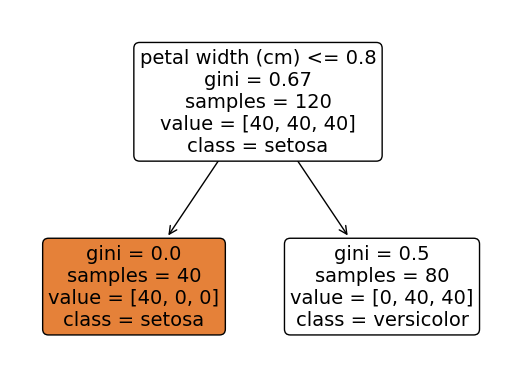

In [113]:
_ = plot_tree(
    stump,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    label='all',
    impurity=True,
    proportion=False,
    precision=2,
    rounded=True, # Improved visualization
    filled=True # Color-code the tree based on majority class
)

In [114]:
describe_tree(stump)

The binary tree structure has 3 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


In [148]:
sample_id = 1
print(X_train.iloc[sample_id])

prediction_path(
    X_train,
    stump,
    sample_id=sample_id # Row from X_train to analyze
)

sepal length (cm)    4.9
sepal width (cm)     2.5
petal length (cm)    4.5
petal width (cm)     1.7
Name: 106, dtype: float64
Rules used to predict sample 1:

decision node 0 : (X[1, 3] = 1.7) > 0.800000011920929)


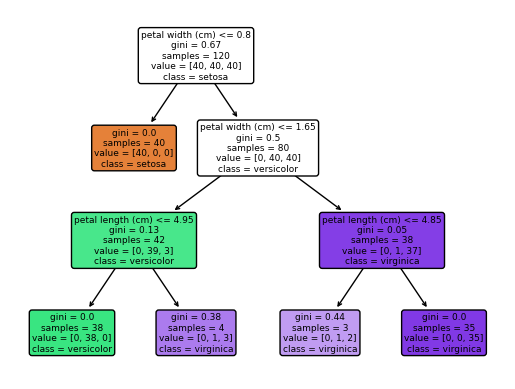

In [116]:
_ = plot_tree(
    tree,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    label='all',
    impurity=True,
    proportion=False,
    precision=2,
    rounded=True, # Improved visualization
    filled=True # Color-code the tree based on majority class
)

In [100]:
describe_tree(tree)

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 3] <= 1.6500000357627869 else to node 6.
		node=3 is a split node: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
		node=6 is a split node: go to node 7 if X[:, 2] <= 4.8500001430511475 else to node 8.
			node=7 is a leaf node.
			node=8 is a leaf node.


In [146]:
sample_id = 1
print(X_train.iloc[sample_id])

prediction_path(
    X_train,
    tree,
    sample_id=sample_id # Row from X_train to analyze
)

sepal length (cm)    4.9
sepal width (cm)     2.5
petal length (cm)    4.5
petal width (cm)     1.7
Name: 106, dtype: float64
Rules used to predict sample 1:

decision node 0 : (X[1, 3] = 1.7) > 0.800000011920929)
decision node 2 : (X[1, 3] = 1.7) > 1.6500000357627869)
decision node 6 : (X[1, 2] = 4.5) <= 4.8500001430511475)


### Visualizing Decision Boundaries

You can visualize the decision boundaries and pathways using sklearn; there are also 3rd party tools which can be nice for an even more enhanced experience.  For example, try [dtreeviz](https://github.com/parrt/dtreeviz).

---
> ❗ Read the documention of `DecisionBoundaryDisplay.from_estimator` from sklearn.
---

Also see [here](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) for more details.

In [63]:
from sklearn.inspection import DecisionBoundaryDisplay
?DecisionBoundaryDisplay.from_estimator

In [76]:
# The visualizer expects there to be only 2 features, so let's retrain a tree
# using on the 2 we care about.
X_ = X_train[['petal length (cm)', 'petal width (cm)']]

tree_viz = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=3,
    class_weight='balanced' # Balance the tree based on class probabilities
).fit(X_, y_train)

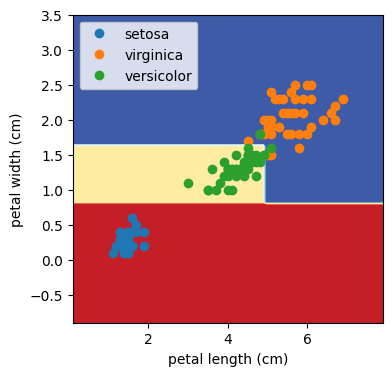

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

for class_ in y_train.unique():
    mask = y_train.values == class_
    ax.plot(X_.iloc[mask,0], X_.iloc[mask,1], 'o', label=data['target_names'][class_])

_ = DecisionBoundaryDisplay.from_estimator(
    tree_viz,
    X_train[['petal length (cm)', 'petal width (cm)']],
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='petal length (cm)',
    ylabel='petal width (cm)',
    ax=ax
)

_ = ax.legend(loc='best')

### Pros and Cons

The [primary advantages](https://scikit-learn.org/stable/modules/tree.html#decision-trees) of decision trees are that they are:

1. 🚆 Easy to train,
2. 🤔 Easy to understand,
3. 📏 Require no data standardization!

To understand the last point, remember, a tree is just finding a delimiting value that splits apart a set of points.  It does not make any assumptions about the shape or distribution of the data.

The primary disadvantages include:

1. ⚖ Can be biased if dataset is imbalanced,
2. ➰ Can easily overfit!

The first issue is straightforward to deal with by using a tool like SMOTE; or we can simply specify `class_weight=balanced` when we instantiate the tree to adjust the weights of each point inverse proportional to the class frequencies.

The second issue can be handled by carefully controlling the depth of the tree (deep trees are more likely to overfit).  Or, we can use another approach: model ensembling.

## Ensemble Methods

### Bagging

### Boosting

## Random Forests

solve dtree issues by using bagging

so allthe advatnages of trees, also oob means you dont have to have separate test set, and easy to aprallelize over many processors.  also, empirically seen almost to nevery overfit with enough member trees so veru insensitive to hyperparemters

only downside is that you lose interpretability, but there are other ways to recover this.

really a magic bullet and these are still state of the art on tabular data!

## Logistic Regression (actually classification!)

# Authentication Models

## Out-of-Distribution / Novelty Detection

## Open Set Recognition

# AutoML

## What is it?

## Caveats


<img src="https://filmschoolrejects.com/wp-content/uploads/2019/08/itsatrap-2.jpg" align="center" height=400 />